This notebook loads the Randoms data set and generates various charts using _Matplotlib_.

In [1]:
from Randoms_2 import load_randoms
import matplotlib.pyplot as plt
import statistics

Load data set in _randoms_map_, which is associating each random value (key) with the list of indexes (value) where it was generated.

In [2]:
randoms_map, count = load_randoms("randoms_db.txt")
print(f"Loaded {len(randoms_map.keys())} unique random generated in a sequence of {count} iterations")

Loaded 43 unique random generated in a sequence of 100 iterations


Generate a bar chart, showing for each random value (X-axis) the number of times it occurred (Y-axis) in the generated sequence.

<BarContainer object of 43 artists>

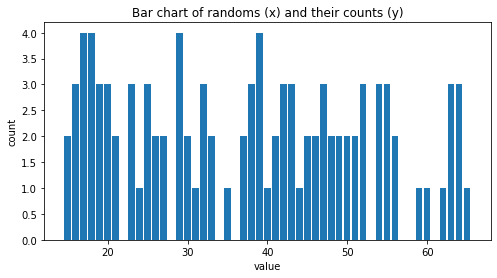

In [3]:
plt.figure(figsize=(8, 4))
plt.title("Bar chart of randoms (x) and their counts (y)")
plt.xlabel("value")
plt.ylabel("count")
plt.bar(randoms_map.keys(), [len(indexes) for indexes in randoms_map.values()])

Create a plot chart linking the points associating each iteration (X-axis) with the random value that was generated at that iteration.

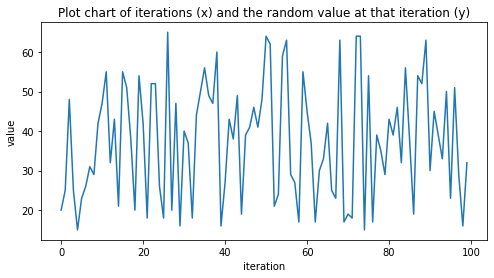

In [4]:
iterations = []
for random_value in randoms_map.keys():
    for index in randoms_map[random_value]:
        iterations.append({"index":index, "value":random_value})
# iterations = [{"index":i, "value":random_value} for random_value in randoms_map.keys() for i in randoms_map[random_value]]
iterations.sort(key= lambda iteration: iteration["index"])
plt.figure(figsize=(8, 4))
plt.title("Plot chart of iterations (x) and the random value at that iteration (y)")
plt.xlabel("iteration")
plt.ylabel("value")
plt.plot([iteration["index"] for iteration in iterations], [iteration["value"] for iteration in iterations]);

Create a boxplot (whiskers) chart showing the quantile distribution of randoms across their entire range: how many fall into the first 25%, 50% (median), 75% and 100% (maximum). The box is configured to cover the entire range, otherwise it would focus on the IQR (Inter Quartile Range) and display outliars as dots. We want the simplest respresentation.

Min random: 15
Median random: 38.5
Max random: 65


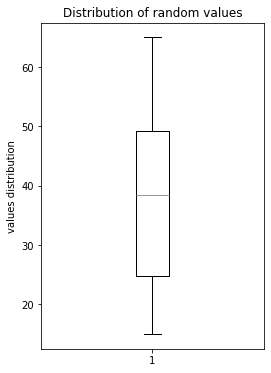

In [5]:
plt.figure(figsize=(4, 6))
plt.title("Distribution of random values")
plt.ylabel("values distribution")
all_randoms = [iteration["value"] for iteration in iterations]
plt.boxplot(all_randoms, whis=[0, 100]);
# print min, median and max
print(f"Min random: {min(all_randoms)}")
print(f"Median random: {statistics.median(all_randoms)}")
print(f"Max random: {max(all_randoms)}")
